# Demarrage

##Importation des lib

In [51]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import pandas as pd
import numpy as np
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#Sickit learn met régulièrement à jour des versions et indique des futurs warnings.
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize






##Montage du Drive

In [52]:
from google.colab import drive
drive.mount('/content/gdrive/')
my_local_drive='/content/gdrive/MyDrive/ProjetML/Dataset'
# Ajout du path pour les librairies, fonctions et données
sys.path.append(my_local_drive)
# Se positionner sur le répertoire associé
%cd $my_local_drive

%pwd




Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
/content/gdrive/MyDrive/ProjetML/Dataset


'/content/gdrive/MyDrive/ProjetML/Dataset'

## Importation DataSet

In [53]:
training_set = pd.read_csv('HAI817_Projet_train.csv')
testing_set = pd.read_csv('HAI817_Projet_test.csv')

#Visualisation

##Etat initial du dataset

In [66]:
display(training_set.head())

,public_id,text,title,our rating
0,5a228e0e,"[Distracted, driving, causes, deaths, Canada, ...","[You, Can, Be, Fined, $1,500, If, Your, Passen...",false
1,30c605a1,"[Missouri, politicians, made, statements, mass...","[Missouri, lawmakers, condemn, Las, Vegas, sho...",mixture
2,c3dea290,"[Home, Alone, 2:, Lost, New, York, full, viole...","[CBC, Cuts, Donald, Trump's, 'Home, Alone, 2',...",mixture
3,f14e8eb6,"[But, things, took, turn, worse, riot, police,...","[Obama’s, Daughters, Caught, on, Camera, Burni...",false
4,faf024d6,"[It’s, secret, Epstein, Schiff, share, long, h...","[Leaked, Visitor, Logs, Reveal, Schiff’s, 78, ...",false


##Valeurs Nulles

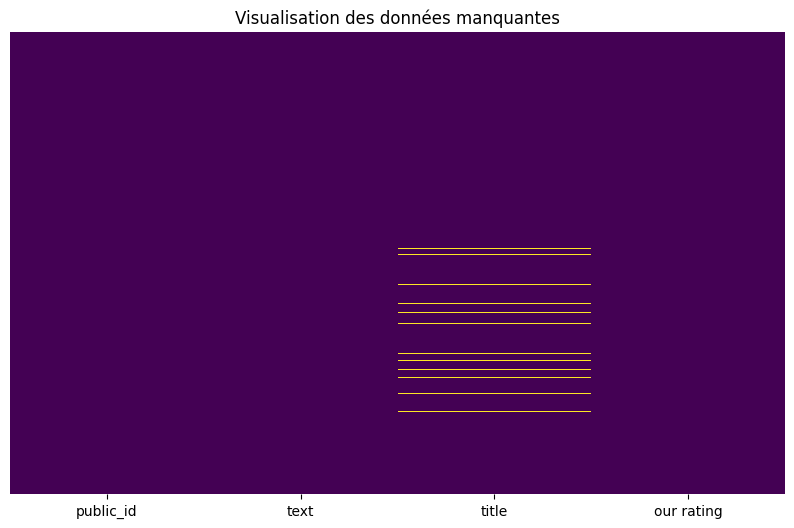

In [68]:
# Calculer les valeurs manquantes
vals_manquantes = training_set.isnull()

# Créer une heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(vals_manquantes, cmap='viridis', cbar=False, yticklabels=False)
plt.title('Visualisation des données manquantes')
plt.show()

###Nombre de valeurs nulles sur chaque set

In [70]:
# Pour l'ensemble d'entraînement
total_nulls_training = training_set.isnull().sum()
percent_nulls_training = (total_nulls_training / training_set.shape[0]) * 100

# Pour l'ensemble de test
total_nulls_testing = testing_set.isnull().sum()
percent_nulls_testing = (total_nulls_testing / testing_set.shape[0]) * 100

# Affichage des résultats pour l'ensemble d'entraînement
print("Ensemble d'entraînement - Nombre et pourcentage de valeurs nulles par colonne:")
print(pd.concat([total_nulls_training, percent_nulls_training], axis=1, keys=['Nombre de Nulles', 'Pourcentage']))

# Affichage des résultats pour l'ensemble de test
print("\nEnsemble de test - Nombre et pourcentage de valeurs nulles par colonne:")
print(pd.concat([total_nulls_testing, percent_nulls_testing], axis=1, keys=['Nombre de Nulles', 'Pourcentage']))


Ensemble d'entraînement - Nombre et pourcentage de valeurs nulles par colonne:
            Nombre de Nulles  Pourcentage
public_id                  0      0.00000
text                       0      0.00000
title                     23      1.81962
our rating                 0      0.00000

Ensemble de test - Nombre et pourcentage de valeurs nulles par colonne:
            Nombre de Nulles  Pourcentage
ID                         0          0.0
text                       0          0.0
title                      0          0.0
our rating                 0          0.0


#Prétraitement

##LowerCase


In [63]:
def lower_case(text):
  return text.map(lambda x: x if type(x)!=str else x.lower())


training_set['title'] = lower_case(training_set['title'])
testing_set['title'] = lower_case(testing_set['title'])

training_set['text'] = lower_case(training_set['text'])
testing_set['text'] = lower_case(testing_set['text'])

display(training_set.head())

,public_id,text,title,our rating
0,5a228e0e,"[Distracted, driving, causes, more, deaths, in...","[You, Can, Be, Fined, $1,500, If, Your, Passen...",false
1,30c605a1,"[Missouri, politicians, have, made, statements...","[Missouri, lawmakers, condemn, Las, Vegas, sho...",mixture
2,c3dea290,"[Home, Alone, 2:, Lost, in, New, York, is, ful...","[CBC, Cuts, Donald, Trump's, 'Home, Alone, 2',...",mixture
3,f14e8eb6,"[But, things, took, a, turn, for, the, worse, ...","[Obama’s, Daughters, Caught, on, Camera, Burni...",false
4,faf024d6,"[It’s, no, secret, that, Epstein, and, Schiff,...","[Leaked, Visitor, Logs, Reveal, Schiff’s, 78, ...",false


##Tokenization

In [59]:
def tokenize(text):
    return text.map(lambda x: x.split() if type(x) == str else x)

training_set['text'] = tokenize(training_set['text'])
testing_set['text'] = tokenize(testing_set['text'])

training_set['title'] = tokenize(training_set['title'])
testing_set['title'] = tokenize(testing_set['title'])

display(training_set.head())

,public_id,text,title,our rating
0,5a228e0e,"[Distracted, driving, causes, more, deaths, in...","[You, Can, Be, Fined, $1,500, If, Your, Passen...",false
1,30c605a1,"[Missouri, politicians, have, made, statements...","[Missouri, lawmakers, condemn, Las, Vegas, sho...",mixture
2,c3dea290,"[Home, Alone, 2:, Lost, in, New, York, is, ful...","[CBC, Cuts, Donald, Trump's, 'Home, Alone, 2',...",mixture
3,f14e8eb6,"[But, things, took, a, turn, for, the, worse, ...","[Obama’s, Daughters, Caught, on, Camera, Burni...",false
4,faf024d6,"[It’s, no, secret, that, Epstein, and, Schiff,...","[Leaked, Visitor, Logs, Reveal, Schiff’s, 78, ...",false


##Enlever les StopWords

In [64]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]


training_set['text'] = training_set['text'].apply(remove_stopwords)
testing_set['text'] = testing_set['text'].apply(remove_stopwords)

training_set['title'] = training_set['title'].apply(remove_stopwords)
testing_set['title'] = testing_set['title'].apply(remove_stopwords)



TypeError: 'float' object is not iterable

#Vectorisation

#Feature Engineering


#Classification

#Evaluation